# $f=\frac{1}{1+r}$

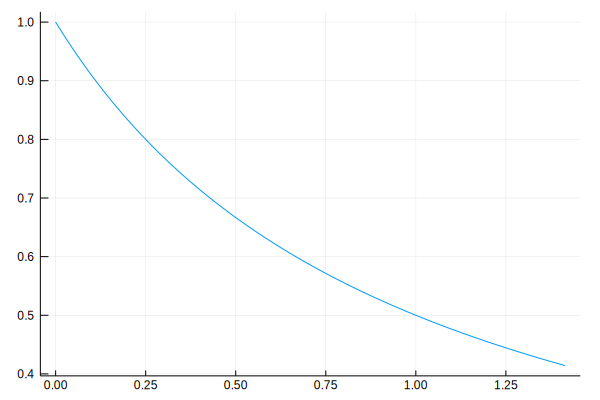

In [1]:
function obj(eta,theta)
    b = 0.8
    a = 1/10*(2b-1)
    x = theta[1]
    y = theta[2]
    r = (x^2+y^2)^0.5
    #m = a*(r-b)^2-a*b^2+1
    #m = cos(10*pi*r) - 0.1r + 2
    m = 1/(1+r)
    return m
end

x = 0:0.01:1
r = zeros(length(x))
fx = zeros(length(x))
for i in 1:length(x)
    r[i] = (x[i]^2+x[i]^2)^0.5
    fx[i] = obj([1,1],[x[i],x[i]])
end
using Plots
plot(r,fx, legend=false)

In [2]:
function proj2(x)
    x = max.(x,design2[:,1])
    x = min.(x,design2[:,2])
    return x
end

function particle(lp2)
    #initialize
    #srand(1992)
    history = zeros(niter2+1,p2*nptc2)
    tau2 = 0.9:(-0.5/niter2):0.4
    v2 = zeros(nptc2, p2)
    ptc2 = rand(nptc2, p2)
    for j2 in 1:p2
            ptc2[:,j2] = (design2[j2,2] - design2[j2,1]) * ptc2[:,j2] .+ design2[j2,1]
    end
    pbesth2 = zeros(nptc2)
    pbest2 = ptc2
    for j2 in 1:nptc2
        pbesth2[j2] = obj([1,1],pbest2[j2,:])
    end
    gbesth2 = findmax(pbesth2)[1]
    gbest2 = pbest2[findmax(pbesth2)[2],:]
    
    history[1,:] = reshape(ptc2, p2*nptc2)

    #iterate
    for i2 in 1:niter2 # iteration number
        g12 = rand(p2)
        g22 = rand(p2)
        for j2 in 1:nptc2 # particle number

            v2[j2,:] = tau2[i2] .*v2[j2,:] + lp2 .* g12 .*(pbest2[j2,:]-ptc2[j2,:]) + lp2 .* g22 .*(gbest2-ptc2[j2,:])
            ptc2[j2,:] = ptc2[j2,:] + v2[j2,:]
            ptc2[j2,:] = proj2(ptc2[j2,:])
            fit2 = obj([1,1],ptc2[j2,:])
            if fit2 > gbesth2
                gbesth2 = pbesth2[j2] = fit2
                gbest2 = pbest2[j2,:] = ptc2[j2,:]
            elseif fit2 > pbesth2[j2]
                pbesth2[j2] = fit2
                pbest2[j2,:] = ptc2[j2,:]
            end
        end
        history[i2+1,:] = reshape(ptc2, p2*nptc2)
    end
    return history
end

particle (generic function with 1 method)

In [3]:
# outer loop
k = 1
nptc = 32
niter = 100
design = [-1 4]
p = size(design)[1]

# inner loop
nptc2 = 50
niter2 = 50
design2 =  [-1 1 ; -1 1]
p2 = size(design2)[1]

result = particle(20)

using StatsPlots

anim = @animate for i=1:51
    scatter(result[i,1:50],result[i,(1:50).+50],legend=false, xlims=(-1,1), ylims=(-1,1),title="$(i-1)", color=:red)
end
gif(anim, "movement_easy_function_big_learning_rate.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /DATA/home/ppinsm/Master's Thesis/movement_easy_function_big_learning_rate.gif
└ @ Plots /DATA/home/ppinsm/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/DATA/home/ppinsm/Master's Thesis/movement_easy_function_big_learning_rate.gif")

In [4]:
result = particle(2)
anim = @animate for i=1:51
    scatter(result[i,1:50],result[i,(1:50).+50],legend=false, xlims=(-1,1), ylims=(-1,1),title="$(i-1)")
end
gif(anim, "movement_easy_function_moderate_learning_rate.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /DATA/home/ppinsm/Master's Thesis/movement_easy_function_moderate_learning_rate.gif
└ @ Plots /DATA/home/ppinsm/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/DATA/home/ppinsm/Master's Thesis/movement_easy_function_moderate_learning_rate.gif")

# $f=cos(8\pi x)-0.1x$

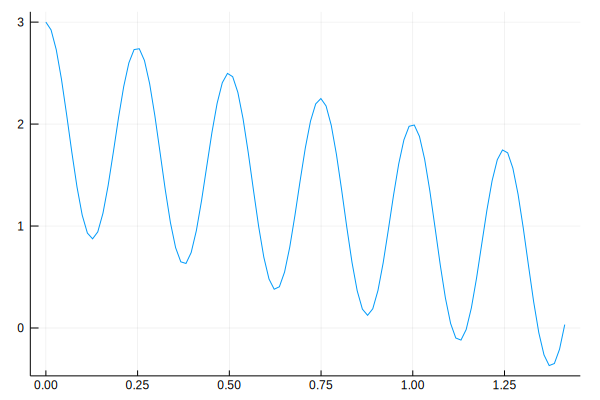

In [5]:
function obj(eta,theta)
    b = 0.8
    a = 1/10*(2b-1)
    x = theta[1]
    y = theta[2]
    r = (x^2+y^2)^0.5
    #m = a*(r-b)^2-a*b^2+1
    m = cos(8*pi*r) - r + 2
    #m = 1/(x+y)
    return m
end

x = 0:0.01:1
r = zeros(length(x))
fx = zeros(length(x))
for i in 1:length(x)
    r[i] = (x[i]^2+x[i]^2)^0.5
    fx[i] = obj([1,1],[x[i],x[i]])
end
plot(r,fx, legend=false)

In [6]:
result = particle(20)
anim = @animate for i=1:51
    scatter(result[i,1:50],result[i,(1:50).+50],legend=false, xlims=(-1,1), ylims=(-1,1),title="$(i-1)",color=:red)
end
gif(anim, "movement_wiggly_function_big_learning_rate.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /DATA/home/ppinsm/Master's Thesis/movement_wiggly_function_big_learning_rate.gif
└ @ Plots /DATA/home/ppinsm/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/DATA/home/ppinsm/Master's Thesis/movement_wiggly_function_big_learning_rate.gif")

In [7]:
result = particle(2)
anim = @animate for i=1:51
    scatter(result[i,1:50],result[i,(1:50).+50],legend=false, xlims=(-1,1), ylims=(-1,1),title="$(i-1)")
end
gif(anim, "movement_wiggly_function_moderate_learning_rate.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /DATA/home/ppinsm/Master's Thesis/movement_wiggly_function_moderate_learning_rate.gif
└ @ Plots /DATA/home/ppinsm/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/DATA/home/ppinsm/Master's Thesis/movement_wiggly_function_moderate_learning_rate.gif")

# $f=ax^2+bx+c$

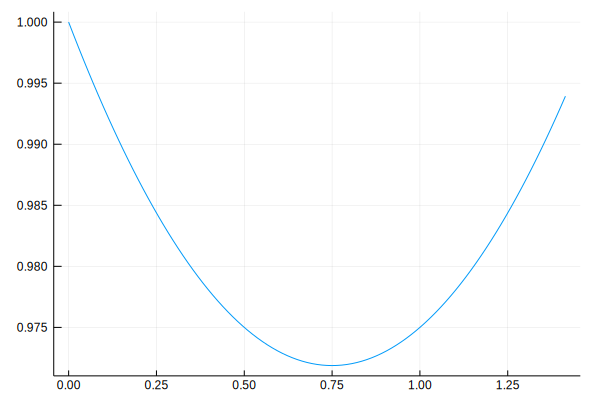

In [8]:
function obj(eta,theta)
    b = 0.75
    a = 1/10*(2b-1)
    x = theta[1]
    y = theta[2]
    r = (x^2+y^2)^0.5
    m = a*(r-b)^2-a*b^2+1
    #m = cos(10*pi*r) - 0.1r + 2
    #m = 1/(x+y)
    return m
end

x = 0:0.01:1
r = zeros(length(x))
fx = zeros(length(x))
for i in 1:length(x)
    r[i] = (x[i]^2+x[i]^2)^0.5
    fx[i] = obj([1,1],[x[i],x[i]])
end
plot(r,fx, legend=false)

In [9]:
result = particle(20)
anim = @animate for i=1:51
    scatter(result[i,1:50],result[i,(1:50).+50],legend=false, xlims=(-1,1), ylims=(-1,1),title="$(i-1)",color=:red)
end
gif(anim, "movement_bimodal_function_big_learning_rate.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /DATA/home/ppinsm/Master's Thesis/movement_bimodal_function_big_learning_rate.gif
└ @ Plots /DATA/home/ppinsm/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/DATA/home/ppinsm/Master's Thesis/movement_bimodal_function_big_learning_rate.gif")

In [10]:
result = particle(2)
anim = @animate for i=1:51
    scatter(result[i,1:50],result[i,(1:50).+50],legend=false, xlims=(-1,1), ylims=(-1,1),title="$(i-1)")
end
gif(anim, "movement_bimodal_function_moderate_learning_rate.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /DATA/home/ppinsm/Master's Thesis/movement_bimodal_function_moderate_learning_rate.gif
└ @ Plots /DATA/home/ppinsm/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/DATA/home/ppinsm/Master's Thesis/movement_bimodal_function_moderate_learning_rate.gif")

In [11]:
result = particle(0.2)
anim = @animate for i=1:51
    scatter(result[i,1:50],result[i,(1:50).+50],legend=false, xlims=(-1,1), ylims=(-1,1),title="$(i-1)")
end
gif(anim, "movement_bimodal_function_moderate_learning_rate.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /DATA/home/ppinsm/Master's Thesis/movement_bimodal_function_moderate_learning_rate.gif
└ @ Plots /DATA/home/ppinsm/.julia/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/DATA/home/ppinsm/Master's Thesis/movement_bimodal_function_moderate_learning_rate.gif")